In [5]:
# Importing Required Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import PowerTransformer,StandardScaler
from sklearn.feature_selection import SelectKBest,f_regression
from sklearn.model_selection import train_test_split

In [9]:
# Load the dataset
file_path = "road_traffic.csv"  
df = pd.read_csv(file_path, encoding="latin1", low_memory=False)

In [11]:
# Display a concise summary of the DataFrame, including column data types, non-null values, and memory usage.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 448950 entries, 0 to 448949
Data columns (total 31 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   ind_id           448950 non-null  object 
 1   ind_definition   448948 non-null  object 
 2   reportyear       448948 non-null  object 
 3   geotype          448948 non-null  object 
 4   geotypevalue     448948 non-null  float64
 5   geoname          448948 non-null  object 
 6   county_name      445371 non-null  object 
 7   county_fips      445371 non-null  float64
 8   region_name      94066 non-null   object 
 9   region_code      94066 non-null   float64
 10  mode             448948 non-null  object 
 11  severity         448948 non-null  object 
 12  injuries         447565 non-null  float64
 13  totalpop         113324 non-null  float64
 14  poprate          111634 non-null  float64
 15  LL95CI_poprate   111634 non-null  float64
 16  UL95CI_poprate   111634 non-null  floa

In [13]:
# Display the first 5 rows of the DataFrame
df.head()

,ind_id,ind_definition,reportyear,geotype,geotypevalue,geoname,county_name,county_fips,region_name,region_code,...,avmttotal,avmtrate,LL95CI_avmtrate,UL95CI_avmtrate,avmtrate_se,avmtrate_rse,CA_decile_avmt,CA_RR_avmtrate,groupquarters,version
0,753,Annual number of fatal and severe road traffic...,2002,CO,6059.0,Orange,Orange,6059.0,Southern California,14.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42364.0,17/12/2013 13:55
1,753,Annual number of fatal and severe road traffic...,2002,CO,6059.0,Orange,Orange,6059.0,Southern California,14.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42364.0,17/12/2013 13:55
2,753,Annual number of fatal and severe road traffic...,2002,CO,6059.0,Orange,Orange,6059.0,Southern California,14.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42364.0,17/12/2013 13:55
3,753,Annual number of fatal and severe road traffic...,2002,CO,6059.0,Orange,Orange,6059.0,Southern California,14.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42364.0,17/12/2013 13:55
4,753,Annual number of fatal and severe road traffic...,2002,CO,6059.0,Orange,Orange,6059.0,Southern California,14.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42364.0,17/12/2013 13:55


In [15]:
# Display the last 5 rows of the DataFrame
df.tail()

,ind_id,ind_definition,reportyear,geotype,geotypevalue,geoname,county_name,county_fips,region_name,region_code,...,avmttotal,avmtrate,LL95CI_avmtrate,UL95CI_avmtrate,avmtrate_se,avmtrate_rse,CA_decile_avmt,CA_RR_avmtrate,groupquarters,version
448945,753,Annual number of fatal and severe road traffic...,2010,PL,80588.0,Truckee town,Nevada,6057.0,Northeast Sierra,6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43.0,17/12/2013 13:55
448946,753,Annual number of fatal and severe road traffic...,2010,PL,80588.0,Truckee town,Nevada,6057.0,Northeast Sierra,6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43.0,17/12/2013 13:55
448947,753,Annual number of fatal and severe road traffic...,2010,PL,80588.0,Truckee town,Nevada,6057.0,Northeast Sierra,6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43.0,17/12/2013 13:55
448948,753,Annual number of fatal and severe road traffic...,2010,PL,80588.0,Truckee town,Nevada,6057.0,Northeast Sierra,6.0,...,35237538.0,28.38,0.0,84.0,28.38,100.0,NaN,1.17,43.0,17/12/2013 13:55
448949,END OF TABLE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
# Generate descriptive statistics for numerical columns in the DataFrame.
# This includes count, mean, standard deviation, min, max, and quartile values.
df.describe()

,geotypevalue,county_fips,region_code,injuries,totalpop,poprate,LL95CI_poprate,UL95CI_poprate,poprate_se,poprate_rse,...,CA_RR_poprate,avmttotal,avmtrate,LL95CI_avmtrate,UL95CI_avmtrate,avmtrate_se,avmtrate_rse,CA_decile_avmt,CA_RR_avmtrate,groupquarters
count,4.489480e+05,445371.000000,94066.000000,447565.000000,1.133240e+05,111634.000000,111634.000000,111634.000000,111634.000000,111634.000000,...,111634.000000,1.232000e+04,11774.000000,11774.000000,11774.000000,11774.000000,11774.000000,859.000000,11774.000000,59418.000000
mean,4.816763e+09,6055.795018,8.762082,6.797583,2.552469e+05,27.683685,4.003514,72.174257,22.699274,109.307087,...,3.458059,3.030277e+09,63.906108,20.575498,122.502802,29.896265,52.303161,5.500582,2.658117,9092.740299
std,3.169910e+09,27.275320,4.892614,122.888407,1.868938e+06,244.278075,43.112864,740.615058,261.962762,69.857055,...,36.298637,2.310024e+10,130.367824,57.250378,290.457158,89.097760,39.049279,2.869084,5.415451,49322.987915
min,1.000000e+00,6001.000000,1.000000,0.200000,0.000000e+00,0.000000,0.000000,0.020000,0.010000,0.860000,...,0.030000,0.000000e+00,0.670000,0.000000,1.610000,0.140000,0.860000,1.000000,0.090000,0.000000
25%,6.011000e+09,6037.000000,4.000000,0.670000,4.424000e+03,3.790000,0.000000,11.850000,2.930000,50.000000,...,0.550000,6.026880e+07,15.370000,0.000000,29.600000,6.010000,23.570000,3.000000,1.010000,208.000000
50%,6.037573e+09,6059.000000,10.000000,1.000000,9.174000e+03,7.930000,0.000000,26.480000,8.390000,100.000000,...,0.950000,1.865109e+08,32.695000,4.025000,58.870000,12.140000,41.520000,6.000000,1.570000,665.000000
75%,6.071009e+09,6073.000000,14.000000,2.000000,6.256300e+04,19.090000,0.060000,48.860000,16.260000,158.250000,...,1.890000,4.844537e+08,61.700000,21.680000,108.285000,25.065000,70.710000,8.000000,2.480000,3242.000000
max,1.000000e+11,6115.000000,14.000000,13578.000000,3.725396e+07,26000.000000,4368.360000,84784.350000,29992.020000,254.030000,...,5182.950000,3.363060e+11,4949.820000,770.840000,11809.920000,3500.050000,223.610000,10.000000,246.050000,834673.000000


In [21]:
# Get the number of rows and columns in the DataFrame.
df.shape

(448950, 31)

In [23]:
# Display the list of column names in the DataFrame
df.columns

Index(['ind_id', 'ind_definition', 'reportyear', 'geotype', 'geotypevalue',
       'geoname', 'county_name', 'county_fips', 'region_name', 'region_code',
       'mode', 'severity', 'injuries', 'totalpop', 'poprate', 'LL95CI_poprate',
       'UL95CI_poprate', 'poprate_se', 'poprate_rse', 'CA_decile_pop',
       'CA_RR_poprate', 'avmttotal', 'avmtrate', 'LL95CI_avmtrate',
       'UL95CI_avmtrate', 'avmtrate_se', 'avmtrate_rse', 'CA_decile_avmt',
       'CA_RR_avmtrate', 'groupquarters', 'version'],
      dtype='object')

In [25]:
# Display the data types of each column in the DataFrame
df.dtypes

ind_id              object
ind_definition      object
reportyear          object
geotype             object
geotypevalue       float64
geoname             object
county_name         object
county_fips        float64
region_name         object
region_code        float64
mode                object
severity            object
injuries           float64
totalpop           float64
poprate            float64
LL95CI_poprate     float64
UL95CI_poprate     float64
poprate_se         float64
poprate_rse        float64
CA_decile_pop      float64
CA_RR_poprate      float64
avmttotal          float64
avmtrate           float64
LL95CI_avmtrate    float64
UL95CI_avmtrate    float64
avmtrate_se        float64
avmtrate_rse       float64
CA_decile_avmt     float64
CA_RR_avmtrate     float64
groupquarters      float64
version             object
dtype: object

In [27]:
# Check for missing values in each column and display the count
df.isnull().sum()

ind_id                  0
ind_definition          2
reportyear              2
geotype                 2
geotypevalue            2
geoname                 2
county_name          3579
county_fips          3579
region_name        354884
region_code        354884
mode                    2
severity                2
injuries             1385
totalpop           335626
poprate            337316
LL95CI_poprate     337316
UL95CI_poprate     337316
poprate_se         337316
poprate_rse        337316
CA_decile_pop      439573
CA_RR_poprate      337316
avmttotal          436630
avmtrate           437176
LL95CI_avmtrate    437176
UL95CI_avmtrate    437176
avmtrate_se        437176
avmtrate_rse       437176
CA_decile_avmt     448091
CA_RR_avmtrate     437176
groupquarters      389532
version                 2
dtype: int64

In [29]:
#Handle Missing Values in Numerical Columns
# Identify numerical columns
numerical_columns = df.select_dtypes(include=['number']).columns

# Fill missing values in numerical columns with median (or use mean)
df[numerical_columns] = df[numerical_columns].fillna(df[numerical_columns].median())

# Display missing values after filling
print("Missing values after filling numerical columns:")
print(df.isnull().sum())


Missing values after filling numerical columns:
ind_id                  0
ind_definition          2
reportyear              2
geotype                 2
geotypevalue            0
geoname                 2
county_name          3579
county_fips             0
region_name        354884
region_code             0
mode                    2
severity                2
injuries                0
totalpop                0
poprate                 0
LL95CI_poprate          0
UL95CI_poprate          0
poprate_se              0
poprate_rse             0
CA_decile_pop           0
CA_RR_poprate           0
avmttotal               0
avmtrate                0
LL95CI_avmtrate         0
UL95CI_avmtrate         0
avmtrate_se             0
avmtrate_rse            0
CA_decile_avmt          0
CA_RR_avmtrate          0
groupquarters           0
version                 2
dtype: int64


In [31]:
# Save the cleaned dataset (optional)
df.to_csv("cleaned_road_traffic.csv", index=False)

print("Cleaned dataset saved as 'cleaned_road_traffic.csv'")

Cleaned dataset saved as 'cleaned_road_traffic.csv'


In [33]:
# Check the number of duplicate rows in the dataset
df.duplicated().sum()

1

In [35]:
# Select and display all numerical features from the dataset
numerical_features = df.select_dtypes(include = 'number')
print(numerical_features)

        geotypevalue  county_fips  region_code  injuries   totalpop  poprate  \
0       6.059000e+03       6059.0         14.0     193.0  2914663.0     6.62   
1       6.059000e+03       6059.0         14.0     721.0  2914663.0    24.74   
2       6.059000e+03       6059.0         14.0       7.0  2914663.0     0.24   
3       6.059000e+03       6059.0         14.0      49.0  2914663.0     1.68   
4       6.059000e+03       6059.0         14.0       1.0  2914663.0     0.03   
...              ...          ...          ...       ...        ...      ...   
448945  8.058800e+04       6057.0          6.0       2.0    16180.0    12.36   
448946  8.058800e+04       6057.0          6.0       1.0    16180.0     6.18   
448947  8.058800e+04       6057.0          6.0       1.0    16180.0     6.18   
448948  8.058800e+04       6057.0          6.0       1.0    16180.0     6.18   
448949  6.037573e+09       6059.0         10.0       1.0     9174.0     7.93   

        LL95CI_poprate  UL95CI_poprate 

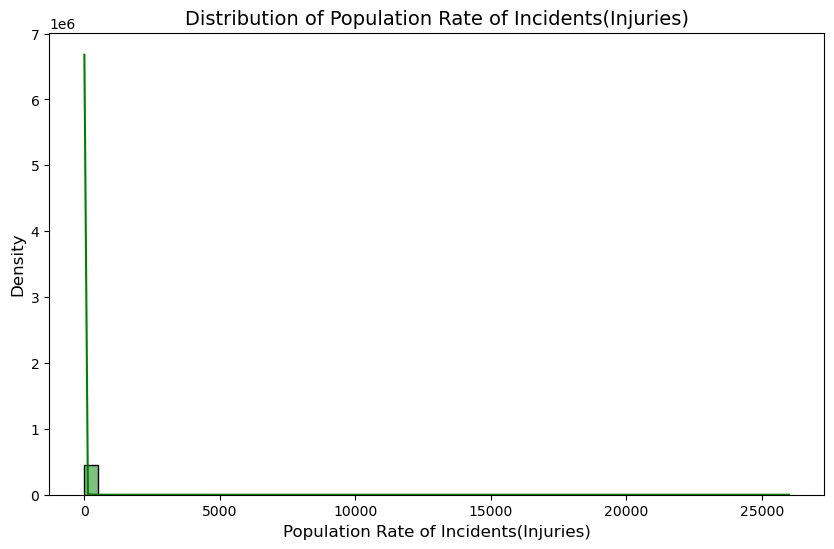

In [41]:
# Distribution of Target Variable


# Set figure size
plt.figure(figsize=(10, 6))

# Plot the distribution of the target variable
sns.histplot(df['poprate'].dropna(), bins=50, kde=True, color='green')

# Add labels and title
plt.xlabel("Population Rate of Incidents(Injuries)", fontsize=12)
plt.ylabel("Density", fontsize=12)
plt.title("Distribution of Population Rate of Incidents(Injuries)", fontsize=14)

# Show the plot
plt.show()

In [62]:

num_columns=df.select_dtypes('number')
num_columns

,geotypevalue,county_fips,region_code,injuries,totalpop,poprate,LL95CI_poprate,UL95CI_poprate,poprate_se,poprate_rse,...,CA_RR_poprate,avmttotal,avmtrate,LL95CI_avmtrate,UL95CI_avmtrate,avmtrate_se,avmtrate_rse,CA_decile_avmt,CA_RR_avmtrate,groupquarters
0,6.059000e+03,6059.0,14.0,193.0,2914663.0,6.62,5.69,7.56,0.48,7.20,...,0.57,186510943.1,32.695,4.025,58.87,12.14,41.52,6.0,1.57,42364.0
1,6.059000e+03,6059.0,14.0,721.0,2914663.0,24.74,22.93,26.54,0.92,3.72,...,0.64,186510943.1,32.695,4.025,58.87,12.14,41.52,6.0,1.57,42364.0
2,6.059000e+03,6059.0,14.0,7.0,2914663.0,0.24,0.06,0.42,0.09,37.80,...,0.95,186510943.1,32.695,4.025,58.87,12.14,41.52,6.0,1.57,42364.0
3,6.059000e+03,6059.0,14.0,49.0,2914663.0,1.68,1.21,2.15,0.24,14.29,...,1.02,186510943.1,32.695,4.025,58.87,12.14,41.52,6.0,1.57,42364.0
4,6.059000e+03,6059.0,14.0,1.0,2914663.0,0.03,0.00,0.10,0.03,100.00,...,0.54,186510943.1,32.695,4.025,58.87,12.14,41.52,6.0,1.57,42364.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
448945,8.058800e+04,6057.0,6.0,2.0,16180.0,12.36,0.00,29.49,8.74,70.71,...,0.44,186510943.1,32.695,4.025,58.87,12.14,41.52,6.0,1.57,43.0
448946,8.058800e+04,6057.0,6.0,1.0,16180.0,6.18,0.00,18.29,6.18,100.00,...,0.39,186510943.1,32.695,4.025,58.87,12.14,41.52,6.0,1.57,43.0
448947,8.058800e+04,6057.0,6.0,1.0,16180.0,6.18,0.00,18.29,6.18,100.00,...,1.30,186510943.1,32.695,4.025,58.87,12.14,41.52,6.0,1.57,43.0
448948,8.058800e+04,6057.0,6.0,1.0,16180.0,6.18,0.00,18.29,6.18,100.00,...,0.29,35237538.0,28.380,0.000,84.00,28.38,100.00,6.0,1.17,43.0


In [67]:

df.shape


(448950, 31)

In [69]:
df1=df.drop_duplicates()

In [71]:
df1.shape

(448949, 31)

In [73]:
df1.isnull().sum()

ind_id                  0
ind_definition          1
reportyear              1
geotype                 1
geotypevalue            0
geoname                 1
county_name          3578
county_fips             0
region_name        354883
region_code             0
mode                    1
severity                1
injuries                0
totalpop                0
poprate                 0
LL95CI_poprate          0
UL95CI_poprate          0
poprate_se              0
poprate_rse             0
CA_decile_pop           0
CA_RR_poprate           0
avmttotal               0
avmtrate                0
LL95CI_avmtrate         0
UL95CI_avmtrate         0
avmtrate_se             0
avmtrate_rse            0
CA_decile_avmt          0
CA_RR_avmtrate          0
groupquarters           0
version                 1
dtype: int64

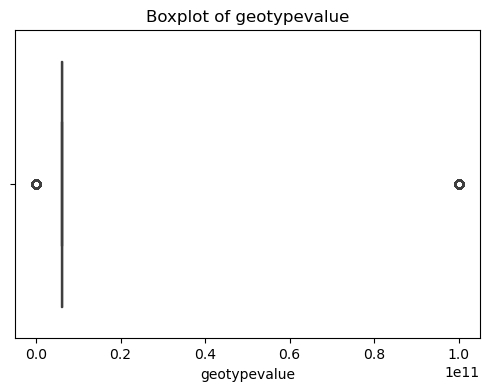

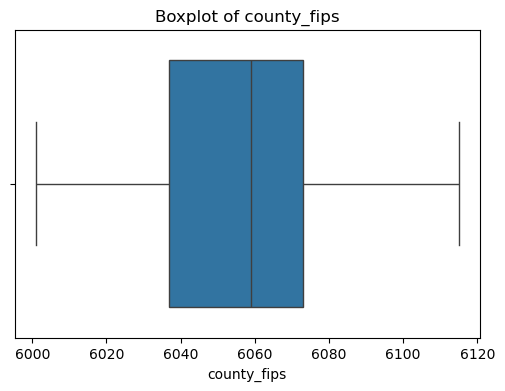

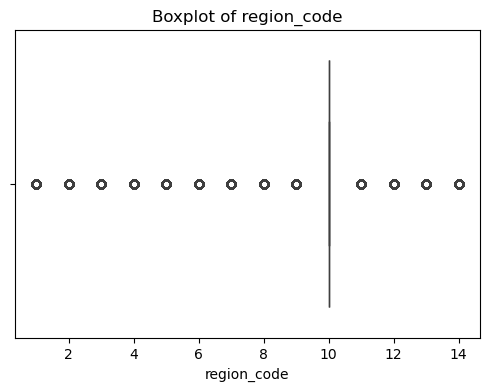

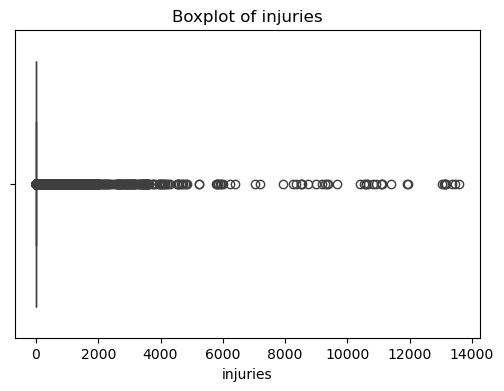

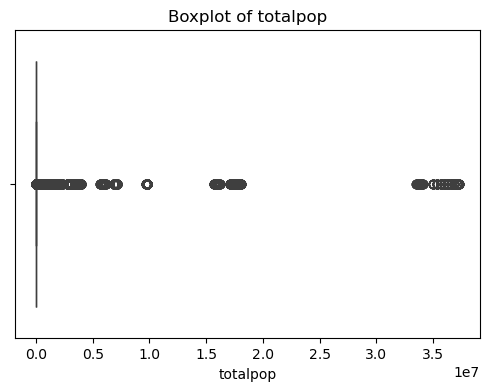

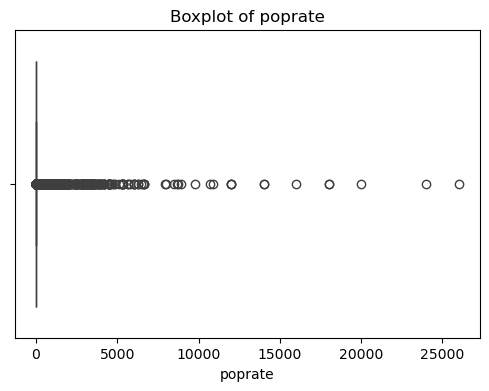

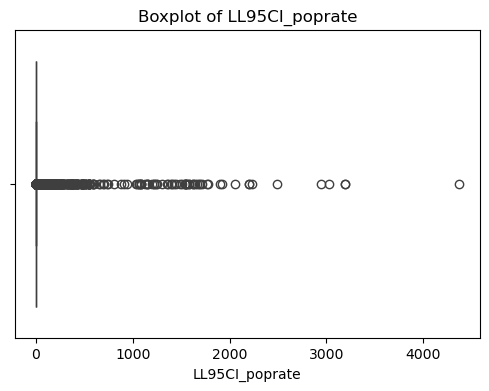

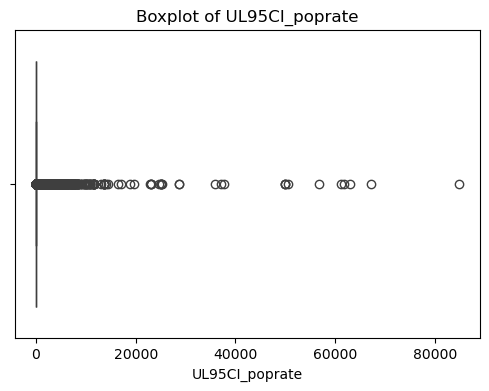

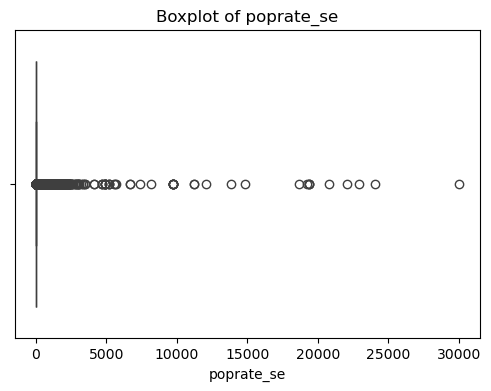

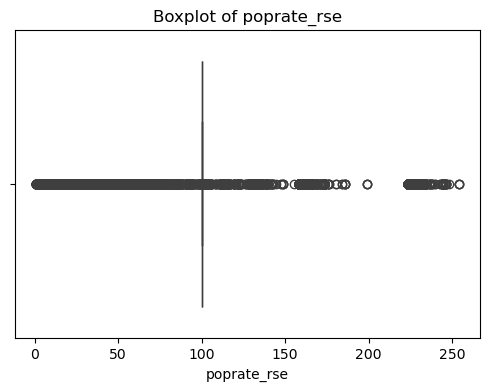

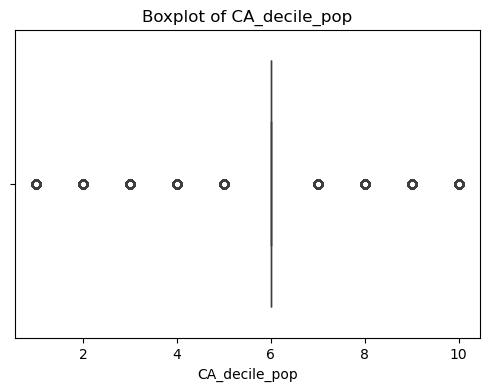

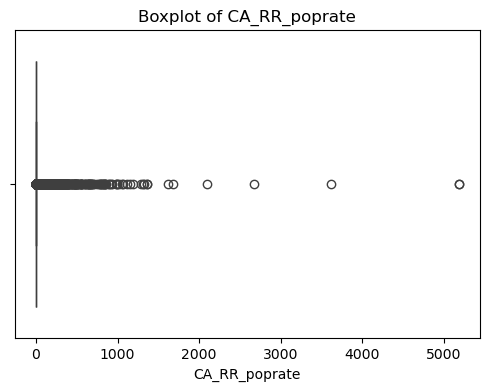

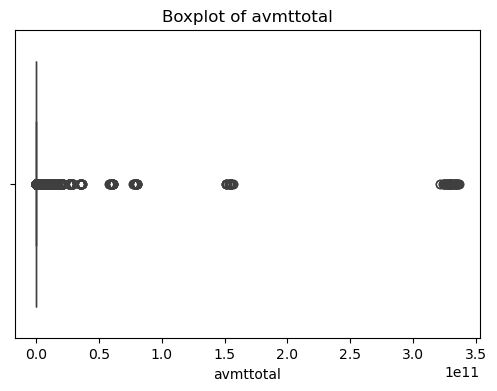

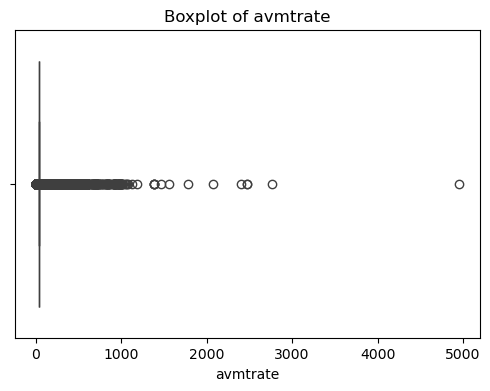

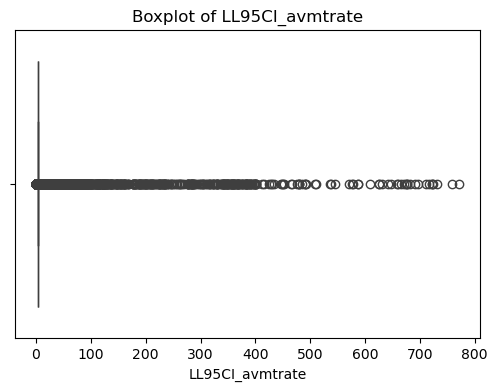

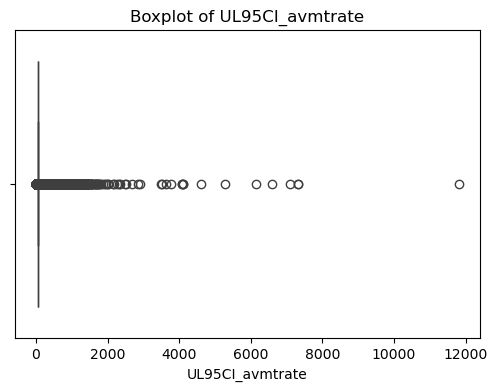

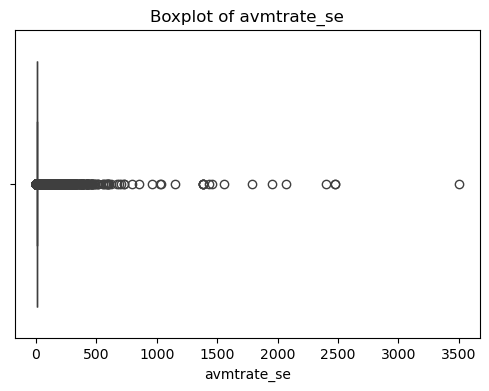

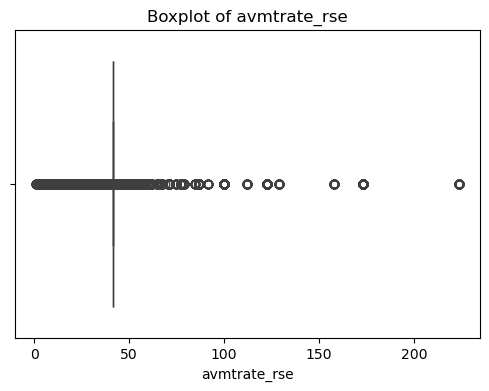

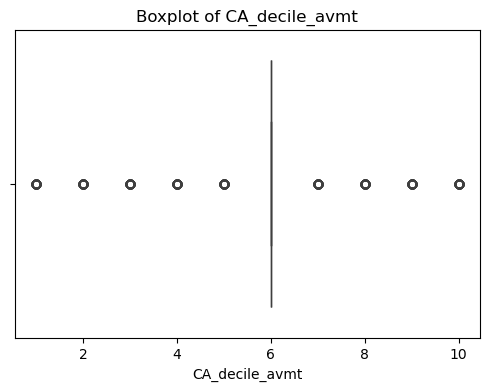

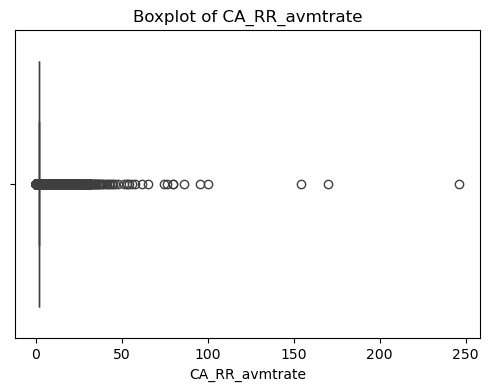

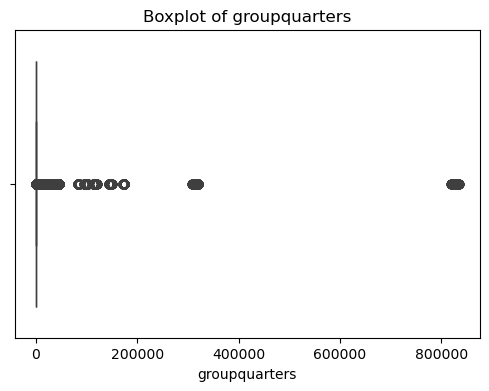

In [93]:
# Loop through each numerical feature and plot its boxplot

# Loop through each numerical column and create a separate boxplot
for col in num_columns:
    plt.figure(figsize=(6, 4))  
    sns.boxplot(data=df, x=col)
    plt.title(f"Boxplot of {col}")
    plt.xlabel(col)
    plt.show()

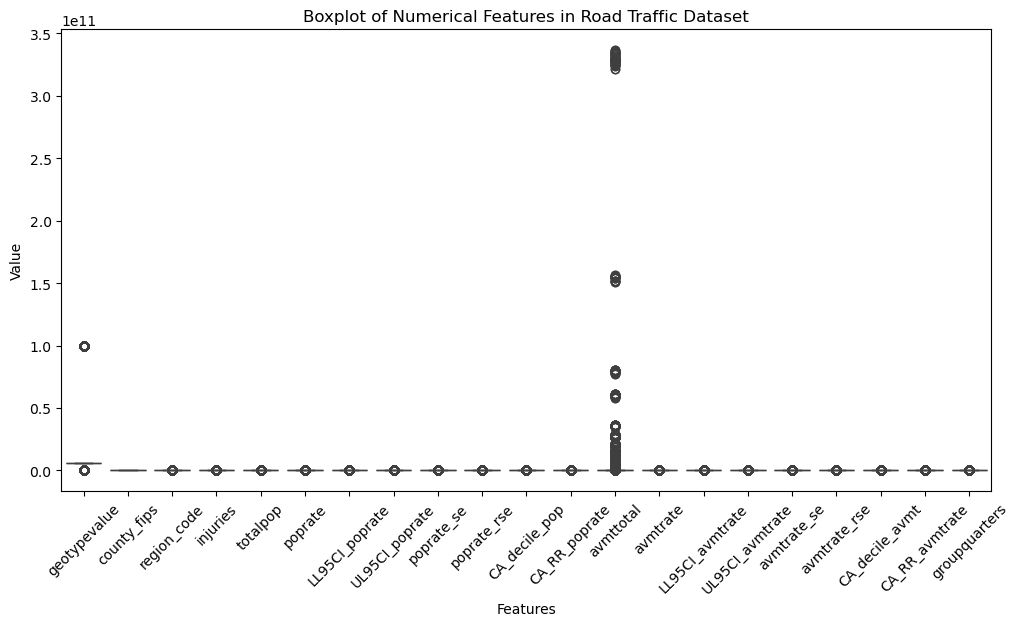

In [97]:
# Selecting only numerical columns
numerical_columns = df.select_dtypes(include=['number'])

# Create a single boxplot for all numerical features
plt.figure(figsize=(12, 6))
sns.boxplot(data=numerical_columns)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.title("Boxplot of Numerical Features in Road Traffic Dataset")
plt.ylabel("Value")
plt.xlabel("Features")
plt.show()

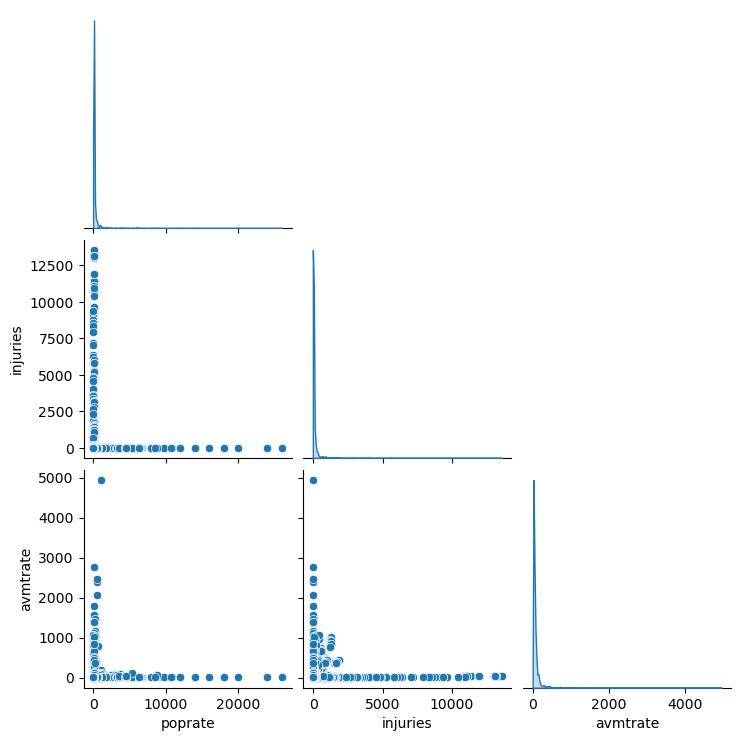

In [103]:
# Creating a pairplot to visualize pairwise relationships between selected numerical features

# Selecting only numerical columns
df1_numeric = df1.select_dtypes(include=['number'])

# List of selected numerical features (update based on dataset)
selected_features = ['poprate', 'injuries', 'avmtrate']  

# Ensure selected features exist in the dataframe
df1_selected = df1_numeric[selected_features].dropna()  # Drop NaN values if any

# Create a pairplot
sns.pairplot(df1_selected, diag_kind='kde', corner=True)
plt.show()

In [105]:
#Define a function to remove outliers
def remove_outliers(df, column):
    """
    Removes outliers from a numerical column using the IQR method.
    
    Parameters:
    df (pd.DataFrame): The DataFrame containing the data.
    column (str): The column name from which to remove outliers.

    Returns:
    pd.DataFrame: A DataFrame with outliers removed.
    """
    Q1 = df[column].quantile(0.25)  # First quartile (25th percentile)
    Q3 = df[column].quantile(0.75)  # Third quartile (75th percentile)
    IQR = Q3 - Q1  # Interquartile range

    # Define lower and upper bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filter the DataFrame
    df_cleaned = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

    return df_cleaned

# Example usage on 'poprate'
df_cleaned = remove_outliers(df, 'poprate')

# Display the number of removed rows
print(f"Rows before: {len(df)}, Rows after outlier removal: {len(df_cleaned)}")

Rows before: 448950, Rows after outlier removal: 337351


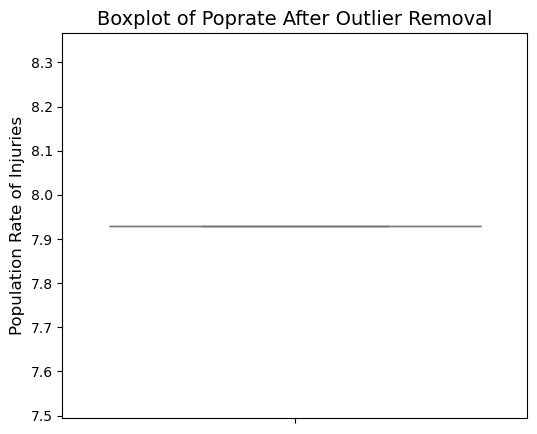

In [107]:
# Remove outliers from 'poprate'
df_outliers_removed = remove_outliers(df, 'poprate')

# Plot boxplot
plt.figure(figsize=(6, 5))
sns.boxplot(y=df_outliers_removed['poprate'], color='lightblue')

# Labels and title
plt.ylabel("Population Rate of Injuries", fontsize=12)
plt.title("Boxplot of Poprate After Outlier Removal", fontsize=14)

# Show the plot
plt.show()


In [109]:
# Selecting only numerical features from the dataset
df2 = df1[numerical_features.columns]
df2

,geotypevalue,county_fips,region_code,injuries,totalpop,poprate,LL95CI_poprate,UL95CI_poprate,poprate_se,poprate_rse,...,CA_RR_poprate,avmttotal,avmtrate,LL95CI_avmtrate,UL95CI_avmtrate,avmtrate_se,avmtrate_rse,CA_decile_avmt,CA_RR_avmtrate,groupquarters
0,6059.0,6059.0,14.0,193.0,2914663.0,6.62,5.69,7.56,0.48,7.20,...,0.57,186510943.1,32.695,4.025,58.87,12.14,41.52,6.0,1.57,42364.0
1,6059.0,6059.0,14.0,721.0,2914663.0,24.74,22.93,26.54,0.92,3.72,...,0.64,186510943.1,32.695,4.025,58.87,12.14,41.52,6.0,1.57,42364.0
2,6059.0,6059.0,14.0,7.0,2914663.0,0.24,0.06,0.42,0.09,37.80,...,0.95,186510943.1,32.695,4.025,58.87,12.14,41.52,6.0,1.57,42364.0
3,6059.0,6059.0,14.0,49.0,2914663.0,1.68,1.21,2.15,0.24,14.29,...,1.02,186510943.1,32.695,4.025,58.87,12.14,41.52,6.0,1.57,42364.0
4,6059.0,6059.0,14.0,1.0,2914663.0,0.03,0.00,0.10,0.03,100.00,...,0.54,186510943.1,32.695,4.025,58.87,12.14,41.52,6.0,1.57,42364.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
448944,56518.0,6057.0,6.0,1.0,9174.0,7.93,0.00,26.48,8.39,100.00,...,0.95,186510943.1,32.695,4.025,58.87,12.14,41.52,6.0,1.57,665.0
448945,80588.0,6057.0,6.0,2.0,16180.0,12.36,0.00,29.49,8.74,70.71,...,0.44,186510943.1,32.695,4.025,58.87,12.14,41.52,6.0,1.57,43.0
448946,80588.0,6057.0,6.0,1.0,16180.0,6.18,0.00,18.29,6.18,100.00,...,0.39,186510943.1,32.695,4.025,58.87,12.14,41.52,6.0,1.57,43.0
448947,80588.0,6057.0,6.0,1.0,16180.0,6.18,0.00,18.29,6.18,100.00,...,1.30,186510943.1,32.695,4.025,58.87,12.14,41.52,6.0,1.57,43.0


In [111]:
# Selecting only numerical columns
df_numerical = df.select_dtypes(include=['number'])

# Display the first few rows
print(df_numerical.head())

# Check the shape of the new DataFrame
print(f"Original dataset shape: {df.shape}")
print(f"Numerical dataset shape: {df_numerical.shape}")

   geotypevalue  county_fips  region_code  injuries   totalpop  poprate  \
0        6059.0       6059.0         14.0     193.0  2914663.0     6.62   
1        6059.0       6059.0         14.0     721.0  2914663.0    24.74   
2        6059.0       6059.0         14.0       7.0  2914663.0     0.24   
3        6059.0       6059.0         14.0      49.0  2914663.0     1.68   
4        6059.0       6059.0         14.0       1.0  2914663.0     0.03   

   LL95CI_poprate  UL95CI_poprate  poprate_se  poprate_rse  ...  \
0            5.69            7.56        0.48         7.20  ...   
1           22.93           26.54        0.92         3.72  ...   
2            0.06            0.42        0.09        37.80  ...   
3            1.21            2.15        0.24        14.29  ...   
4            0.00            0.10        0.03       100.00  ...   

   CA_RR_poprate    avmttotal  avmtrate  LL95CI_avmtrate  UL95CI_avmtrate  \
0           0.57  186510943.1    32.695            4.025            5

In [113]:
# Define target variable (dependent variable)
target = 'poprate'  # Change this if needed

# Separate features (X) and target (y)
X = df_numerical.drop(columns=[target])  # Independent variables
y = df_numerical[target]  # Dependent variable

# Display shapes
print(f"Features (X) shape: {X.shape}")
print(f"Target (y) shape: {y.shape}")

# Display first few rows of features and target
print("First few rows of features (X):")
print(X.head())

print("\nFirst few values of target (y):")
print(y.head())


Features (X) shape: (448950, 20)
Target (y) shape: (448950,)
First few rows of features (X):
   geotypevalue  county_fips  region_code  injuries   totalpop  \
0        6059.0       6059.0         14.0     193.0  2914663.0   
1        6059.0       6059.0         14.0     721.0  2914663.0   
2        6059.0       6059.0         14.0       7.0  2914663.0   
3        6059.0       6059.0         14.0      49.0  2914663.0   
4        6059.0       6059.0         14.0       1.0  2914663.0   

   LL95CI_poprate  UL95CI_poprate  poprate_se  poprate_rse  CA_decile_pop  \
0            5.69            7.56        0.48         7.20            6.0   
1           22.93           26.54        0.92         3.72            6.0   
2            0.06            0.42        0.09        37.80            6.0   
3            1.21            2.15        0.24        14.29            6.0   
4            0.00            0.10        0.03       100.00            6.0   

   CA_RR_poprate    avmttotal  avmtrate  LL95CI

In [115]:
#Using Correlation Analysis (Pearson's Correlation)import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation matrix
correlation_matrix = df_numerical.corr()

# Sort correlation values with target variable
correlation_target = correlation_matrix['poprate'].sort_values(ascending=False)

# Display top correlated features
print("Feature Correlation with Target (poprate):")
print(correlation_target)



Feature Correlation with Target (poprate):
poprate            1.000000
UL95CI_poprate     0.952298
poprate_se         0.897907
LL95CI_poprate     0.417525
CA_RR_poprate      0.402548
UL95CI_avmtrate    0.021335
avmtrate           0.021010
avmtrate_se        0.020161
CA_RR_avmtrate     0.019478
LL95CI_avmtrate    0.010139
injuries           0.004085
region_code        0.002919
avmttotal          0.000980
groupquarters     -0.002272
totalpop          -0.003108
avmtrate_rse      -0.005349
CA_decile_avmt    -0.005557
county_fips       -0.011335
geotypevalue      -0.023591
poprate_rse       -0.035886
CA_decile_pop     -0.065318
Name: poprate, dtype: float64


Skewness of Numerical Features:
geotypevalue        11.065037
county_fips          0.013089
region_code         -2.022711
injuries            65.242402
totalpop            29.512952
poprate            100.806040
LL95CI_poprate      90.720693
UL95CI_poprate     121.789781
poprate_se         129.449948
poprate_rse          1.456983
CA_decile_pop       -3.420067
CA_RR_poprate      152.379996
avmttotal           76.783286
avmtrate            64.324092
LL95CI_avmtrate     42.616716
UL95CI_avmtrate     89.513778
avmtrate_se        102.480696
avmtrate_rse        12.582902
CA_decile_avmt     -11.528837
CA_RR_avmtrate     100.278425
groupquarters       35.840352
dtype: float64


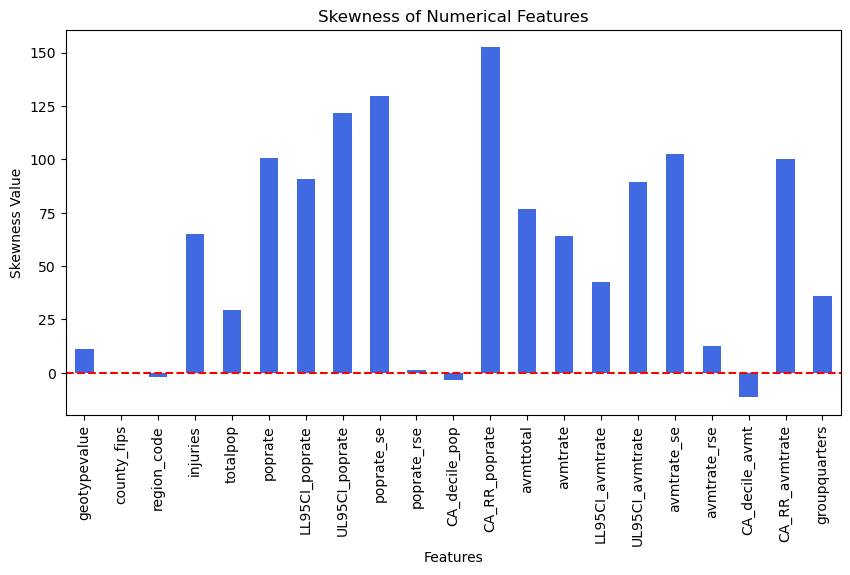

In [117]:
# Calculate skewness for all numerical features
skewness_values = df_numerical.skew()

# Display skewness values
print("Skewness of Numerical Features:")
print(skewness_values)

# Visualizing skewness using a bar plot
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
skewness_values.plot(kind='bar', color='royalblue')
plt.axhline(y=0, color='r', linestyle='--')  # Reference line at 0 (no skew)
plt.title("Skewness of Numerical Features")
plt.xlabel("Features")
plt.ylabel("Skewness Value")
plt.show()


In [119]:
# Convert 'poprate' to numeric, coercing errors
df['poprate'] = pd.to_numeric(df['poprate'], errors='coerce')

# Drop NaN values
df_cleaned = df.dropna(subset=['poprate'])

# Calculate skewness
skewness = df_cleaned['poprate'].skew()

print(f"Skewness of poprate: {skewness}")

Skewness of poprate: 100.80604033176198


In [122]:
from sklearn.preprocessing import PowerTransformer
# Initialize the transformer (Yeo-Johnson supports both positive & negative values)
pt = PowerTransformer(method='yeo-johnson')

# Apply transformation to all numerical features
df_transformed = df_numerical.copy()
df_transformed.iloc[:, :] = pt.fit_transform(df_numerical)

# Display the first few rows
print("Transformed Data (First 5 Rows):")
print(df_transformed.head())

Transformed Data (First 5 Rows):
   geotypevalue  county_fips  region_code  injuries  totalpop   poprate  \
0     -1.939208     0.120089     2.700341  2.341610  4.693609 -0.311263   
1     -1.939208     0.120089     2.700341  2.365783  4.693609  1.822160   
2     -1.939208     0.120089     2.700341  1.687923  4.693609 -4.931819   
3     -1.939208     0.120089     2.700341  2.253451  4.693609 -2.719731   
4     -1.939208     0.120089     2.700341 -0.165618  4.693609 -5.529185   

   LL95CI_poprate  UL95CI_poprate  poprate_se  poprate_rse  ...  \
0        3.990884       -2.016654   -3.715483    -3.508485  ...   
1        3.990884        0.039221   -3.147919    -3.748039  ...   
2        1.376337       -5.277087   -4.398800    -2.061147  ...   
3        3.985138       -3.815884   -4.108574    -3.103296  ...   
4       -0.257232       -5.750571   -4.527264    -0.012431  ...   

   CA_RR_poprate  avmttotal  avmtrate  LL95CI_avmtrate  UL95CI_avmtrate  \
0      -1.354092   0.003371  0.008781 

In [124]:
#Step 1: Recalculate Skewness After Transformation

skewness_transformed = df_transformed.skew()

# Display skewness values
print("Skewness After Yeo-Johnson Transformation:")
print(skewness_transformed)



Skewness After Yeo-Johnson Transformation:
geotypevalue       -1.357277
county_fips         0.000364
region_code         0.307579
injuries            0.212111
totalpop           -0.684133
poprate            -0.379185
LL95CI_poprate      3.669634
UL95CI_poprate     -0.059031
poprate_se         -0.169961
poprate_rse         0.403645
CA_decile_pop       2.927007
CA_RR_poprate      -0.523322
avmttotal          -0.337292
avmtrate           -0.720996
LL95CI_avmtrate    -0.809450
UL95CI_avmtrate    -1.169710
avmtrate_se        -1.299952
avmtrate_rse        1.309766
CA_decile_avmt     10.167968
CA_RR_avmtrate     -2.996241
groupquarters       0.029892
dtype: float64


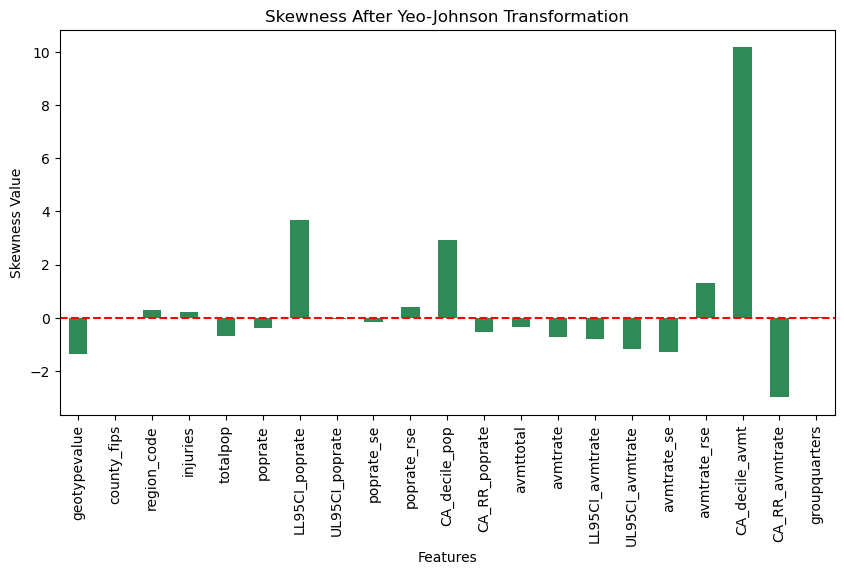

In [126]:
#Step 2: Visualizing Skewness After Transformation
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
skewness_transformed.plot(kind='bar', color='seagreen')
plt.axhline(y=0, color='r', linestyle='--')  # Reference line at 0 (no skew)
plt.title("Skewness After Yeo-Johnson Transformation")
plt.xlabel("Features")
plt.ylabel("Skewness Value")
plt.show()


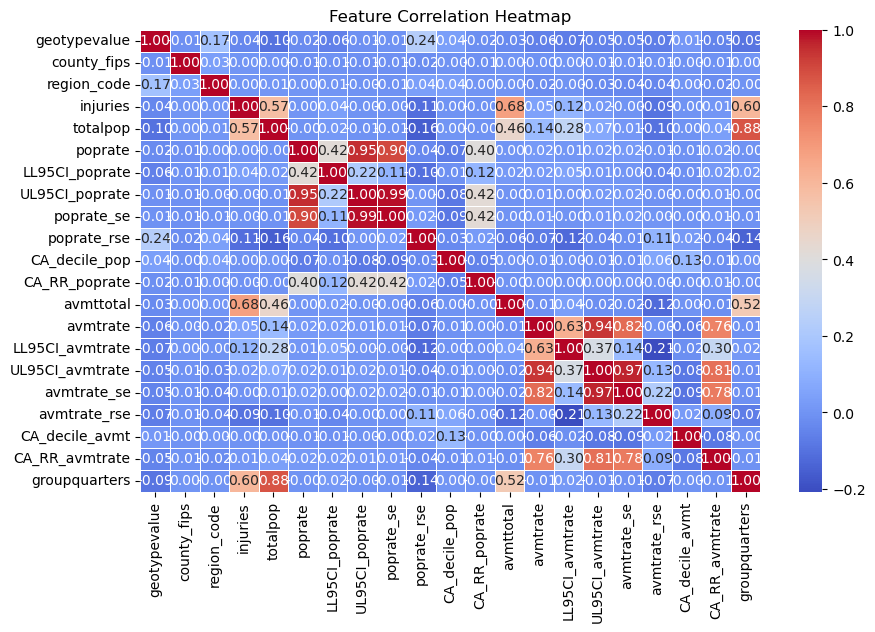

In [128]:
# Visualizing correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

In [130]:
#scaling
from sklearn.preprocessing import StandardScaler

# Selecting only numerical columns to scale from df (replace df with your dataset name)
df_numeric = df.select_dtypes(include=['number'])  

# Initialize the StandardScaler
scaler = StandardScaler()

# Apply scaling
x_scaled = scaler.fit_transform(df_numeric)

# Convert back to DataFrame
df_scaled = pd.DataFrame(x_scaled, columns=df_numeric.columns)

print("Standard Scaled Data (First 5 Rows):")
print(df_scaled.head())


Standard Scaled Data (First 5 Rows):
   geotypevalue  county_fips  region_code  injuries  totalpop   poprate  \
0     -1.519531     0.117029     1.855539  1.517700  3.008729 -0.050954   
1     -1.519531     0.117029     1.855539  5.820914  3.008729  0.097439   
2     -1.519531     0.117029     1.855539  0.001795  3.008729 -0.103202   
3     -1.519531     0.117029     1.855539  0.344097  3.008729 -0.091409   
4     -1.519531     0.117029     1.855539 -0.047105  3.008729 -0.104922   

   LL95CI_poprate  UL95CI_poprate  poprate_se  poprate_rse  ...  \
0        0.217662       -0.081880   -0.087694    -2.712446  ...   
1        1.017001       -0.030560   -0.084329    -2.811688  ...   
2       -0.043375       -0.101186   -0.090676    -1.839803  ...   
3        0.009946       -0.096508   -0.089529    -2.510255  ...   
4       -0.046157       -0.102051   -0.091135    -0.065998  ...   

   CA_RR_poprate  avmttotal  avmtrate  LL95CI_avmtrate  UL95CI_avmtrate  \
0      -0.055350  -0.020245 -0.037

In [132]:
# Splitting the dataset into training (80%) and testing (20%) sets
from sklearn.model_selection import train_test_split

# Assuming df is your dataset and 'target_variable' is the dependent variable
X = df.drop(columns=['poprate'])  # Independent features
y = df['poprate']  # Target variable

# Splitting the dataset into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display shapes of the resulting sets
print(f"Training set: X_train = {X_train.shape}, y_train = {y_train.shape}")
print(f"Testing set: X_test = {X_test.shape}, y_test = {y_test.shape}")


Training set: X_train = (359160, 30), y_train = (359160,)
Testing set: X_test = (89790, 30), y_test = (89790,)
